In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/epi_r.csv')

In [3]:
# let's see if a decision tree will help us id the best features
best_rating = pd.DataFrame()
best_rating['EvalFactor'] = np.where(raw_data['rating'] >= 4.8,1,0)
eval_data = raw_data.drop(['rating','title', 'calories', 'protein', 'fat', 'sodium'],axis=1)

# help pyplot find graphviz executables
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz



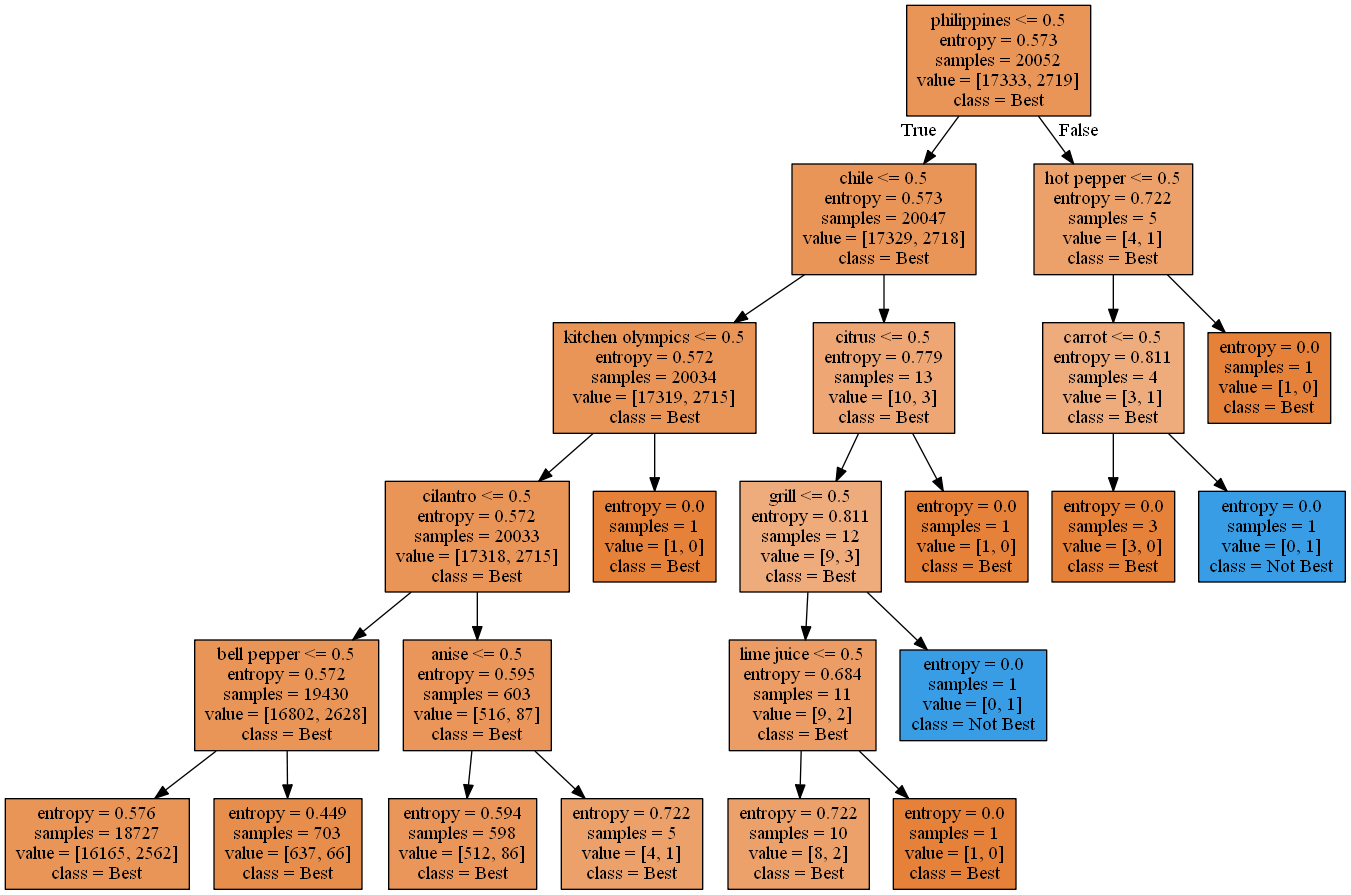

In [4]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
)
decision_tree.fit(eval_data, best_rating)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=eval_data.columns,
    class_names=['Best', 'Not Best'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [5]:
# tree doesn't seem so reliable.  Let's get the top 30 features that got the highest ratings
less_data = pd.DataFrame()
less_data = raw_data[['title','rating','bake', 'dairy free', 'dessert','dinner', 'drink', 
                     'fall', 'fruit', 'gourmet', 'healthy', 'kid-friendly', 
                     'kidney friendly', 'kosher', 'milk/cream', 'no sugar added', 
                     'onion', 'peanut free', 'pescatarian', 'quick & easy', 'side', 
                     'soy free', 'sugar conscious', 'summer', 'thanksgiving', 
                      'tomato', 'tree nut free', 'vegan', 'vegetarian', 
                      'wheat/gluten-free', 'winter','bon app��tit']].copy()

In [6]:
# setup classifier
less_data['classrate'] = np.where(less_data['rating'] > 4.8, 1,0)

In [7]:
from sklearn.svm import SVR
svr = SVR(gamma='auto')
X = less_data.drop(['rating', 'title','classrate'], 1).sample(frac=0.2, replace=True, random_state=1)
Y = less_data.classrate.sample(frac=0.2, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

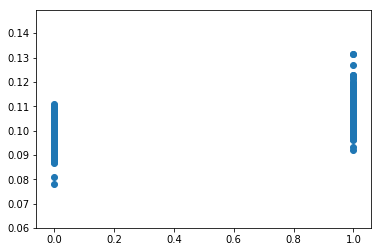

In [8]:
plt.scatter(Y, svr.predict(X))

In [9]:
svr.score(X, Y)

-0.006270157556271582

In [10]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

array([-0.01191479, -0.00952836, -0.01644978, -0.00704578, -0.01960642])